## multiple Linear Regression
- developer: mehdi sahraei
- [link github](https://github.com/mehdisahraeei)

### Importing Needed packages


In [436]:
import joblib
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data with pandas
- taking a look at the dataset and analyzing data

In [19]:
df = pd.read_csv("split_with_timestep.csv")

df.head() #View the beginning of the data
#tail is used for Viewing the end of the data

,Unnamed: 0,x1,x2,x3,x4,x5,y
0,0,302.00,293.96,290.91,299.10,323.29,309.80
1,1,293.96,290.91,299.10,323.29,309.80,315.74
2,2,290.91,299.10,323.29,309.80,315.74,323.42
3,3,299.10,323.29,309.80,315.74,323.42,327.24
4,4,323.29,309.80,315.74,323.42,327.24,330.79


### Data Exploration

In [20]:
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1119.500000,1172.567558,1173.152286,1173.755442,1174.354844,1174.950263,1175.511353
std,646.776623,1120.985121,1120.872414,1120.762606,1120.649268,1120.538336,1120.426357
min,0.000000,83.760000,83.760000,83.760000,83.760000,83.760000,83.760000
25%,559.750000,229.932500,229.932500,229.932500,229.932500,229.932500,229.932500
50%,1119.500000,678.415000,680.100000,680.455000,680.820000,681.960000,683.435000
75%,1679.250000,1816.892500,1816.892500,1816.892500,1816.892500,1816.892500,1816.892500
max,2239.000000,4807.980000,4807.980000,4807.980000,4807.980000,4807.980000,4807.980000


### A more concise view of the data

In [25]:
cdf = df[['x1','x2','x3','x4','x5','y']]
cdf.head(10)

,x1,x2,x3,x4,x5,y
0,302.00,293.96,290.91,299.10,323.29,309.80
1,293.96,290.91,299.10,323.29,309.80,315.74
2,290.91,299.10,323.29,309.80,315.74,323.42
3,299.10,323.29,309.80,315.74,323.42,327.24
4,323.29,309.80,315.74,323.42,327.24,330.79
5,309.80,315.74,323.42,327.24,330.79,348.13
6,315.74,323.42,327.24,330.79,348.13,346.00
7,323.42,327.24,330.79,348.13,346.00,374.70
8,327.24,330.79,348.13,346.00,374.70,385.93
9,330.79,348.13,346.00,374.70,385.93,384.79


### data histogram

- For example, if the cylinder value be 4, There are 400 data in the dataset, whose cylinder is equal to 4

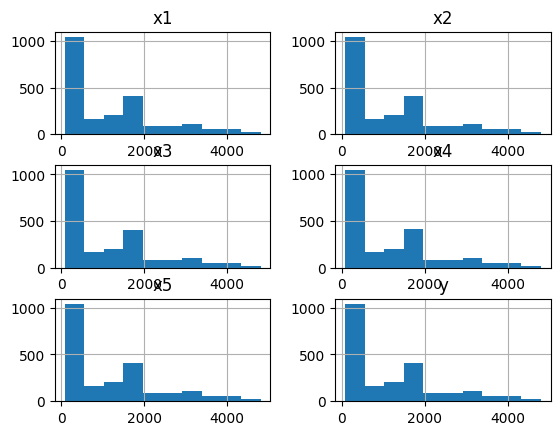

In [26]:
df_hist = cdf[['x1','x2','x3','x4','x5','y']]
df_hist.hist()
plt.show()

### drawing plot and scatter

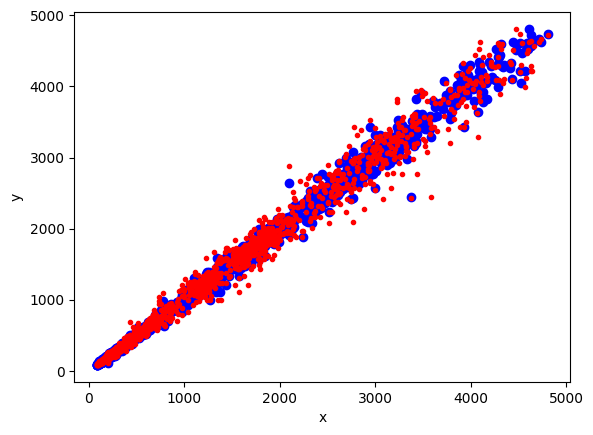

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cdf.x5, cdf.y,  color='blue')
ax.scatter(cdf.x3, cdf.y,  color='red',marker='.')

plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Creating train and test dataset
#### 20 % for test and 80 for train

In [28]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [29]:
print('train: \t', train.shape, '\n' , 'test: \t', test.shape)

train: 	 (1806, 6) 
 test: 	 (434, 6)


### drawing plot and scatter train and test

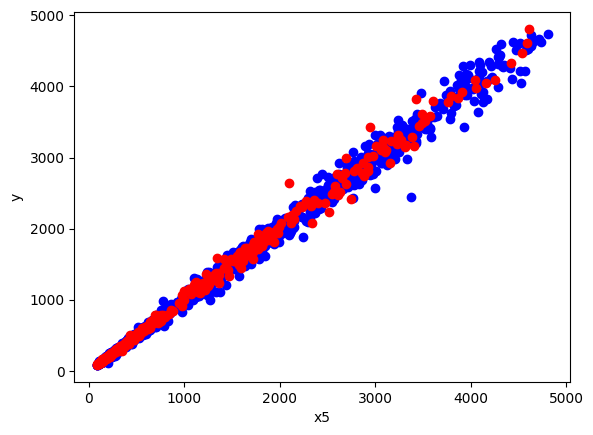

In [117]:
fig1 = plt.figure()
ax = fig1.add_subplot(111)
ax.scatter(train.x5, train.y,  color='blue')
ax.scatter(test.x5, test.y,  color='red')
plt.xlabel("x5")
plt.ylabel("y")
plt.show()

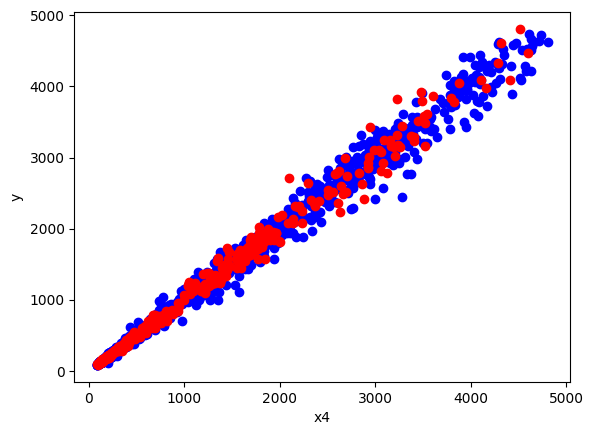

In [31]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(train.x4, train.y,  color='blue')
ax.scatter(test.x4, test.y,  color='red')
plt.xlabel("x4")
plt.ylabel("y")
plt.show()

### normalizing data

#### before norm

In [205]:
#asanyarray: converting to normal array 
train_x = np.asanyarray(train[['x1','x2','x3','x4','x5']])
train_y = np.asanyarray(train[['y']])

test_x = np.asanyarray(test[['x1','x2','x3','x4','x5']])
test_y = np.asanyarray(test[['y']])

In [232]:
train_x.shape

(1806, 5)

#### after norm

In [206]:
scaler = MinMaxScaler(feature_range = (0,1))
train_x = scaler.fit_transform(train_x)
train_y = scaler.fit_transform(train_y)

test_x = scaler.fit_transform(test_x)
test_y = scaler.fit_transform(test_y)

### training model

- Converting the data into a normal array So that it is suitable for the model format

- [link regr](https://scikit-learn.org/stable/supervised_learning.html)

In [207]:

regr = linear_model.LinearRegression()


#train_x , train_y data are fitted with together and the best line is obtained and it will be final model
regr.fit (train_x, train_y)

# The coefficients
print('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-0.03027479 -0.03800714  0.03075488  0.13635751  0.91429991]]
Intercept:  [0.00055153]


### model Evaluation

In [208]:

predict = regr.predict(test_x) #y_hat

print("Mean absolute error: %.2f" % np.mean(np.absolute(predict - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predict - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predict) )


Mean absolute error: 0.02
Residual sum of squares (MSE): 0.00
R2-score: 0.99


### testing

In [209]:
predict[:3]

array([[0.05249419],
       [0.05579127],
       [0.05783114]])

In [210]:
test_y[:3]

array([[0.04959341],
       [0.05483017],
       [0.04119045]])

In [211]:
predict = scaler.inverse_transform(predict)[:]
predict

array([[ 337.10750979],
       [ 352.66503123],
       [ 362.29030349],
       [ 305.26154762],
       [ 351.13750063],
       [ 311.37115501],
       [ 323.36833065],
       [ 310.52882444],
       [ 313.32997902],
       [ 318.6230733 ],
       [ 365.07258562],
       [ 313.06248809],
       [ 313.69345818],
       [ 314.69154254],
       [ 315.918143  ],
       [ 311.50742024],
       [ 311.32631423],
       [ 328.9768223 ],
       [ 325.03468646],
       [ 332.7834698 ],
       [ 353.04157942],
       [ 451.62909907],
       [ 479.62076281],
       [ 486.18996659],
       [ 462.985041  ],
       [ 733.96494802],
       [ 721.86160968],
       [ 744.25760029],
       [ 748.11117708],
       [ 774.09608745],
       [1005.48787921],
       [1439.02046757],
       [1040.85688153],
       [1032.74162448],
       [1179.03668386],
       [1166.76925076],
       [ 790.898272  ],
       [ 911.2748898 ],
       [1026.92937198],
       [ 938.39381813],
       [ 887.93155402],
       [ 907.752

In [212]:
test_y = scaler.inverse_transform(test_y)[:]
test_y

array([[ 323.42],
       [ 348.13],
       [ 283.77],
       [ 312.09],
       [ 334.49],
       [ 284.  ],
       [ 296.5 ],
       [ 294.81],
       [ 310.8 ],
       [ 298.64],
       [ 337.96],
       [ 281.09],
       [ 294.71],
       [ 296.33],
       [ 291.87],
       [ 305.  ],
       [ 303.02],
       [ 305.24],
       [ 312.99],
       [ 335.61],
       [ 346.66],
       [ 457.51],
       [ 457.63],
       [ 460.3 ],
       [ 509.69],
       [ 673.75],
       [ 705.03],
       [ 784.  ],
       [ 750.  ],
       [ 681.06],
       [ 959.3 ],
       [1271.  ],
       [ 994.  ],
       [1061.  ],
       [1251.96],
       [1124.81],
       [ 781.66],
       [ 841.57],
       [ 911.  ],
       [ 835.89],
       [ 801.49],
       [ 856.02],
       [ 695.46],
       [ 608.83],
       [ 537.  ],
       [ 385.05],
       [ 378.16],
       [ 416.07],
       [ 429.52],
       [ 701.58],
       [ 779.  ],
       [ 785.99],
       [ 752.49],
       [ 748.99],
       [ 676.96],
       [ 7

In [213]:
predict.shape

(434, 1)

### plotting

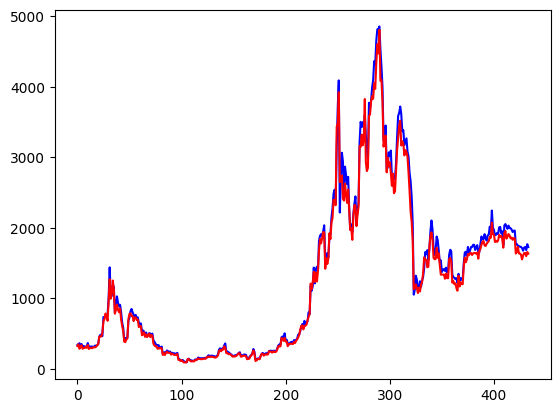

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(predict,'-b')
ax.plot(test_y,'-r')
plt.show()

### final testing 

In [418]:
test_norm = np.array([1667.45,1670.89,1733.79,1662.4,1656.88])
test_norm = test_norm.astype('float128')
test_norm = test_norm.reshape(-1,1)
test_norm.shape


(5, 1)

In [419]:
scaler_ = MinMaxScaler(feature_range = (0,1))
test_norm = scaler_.fit_transform(test_norm).reshape(1,5)
print(test_norm[:5],'\n')
print(test_norm.shape)

[[0.13743336 0.18216097 1.         0.0717722  0.        ]] 

(1, 5)


In [420]:
_new = regr.predict(test_norm)
_new.shape

(1, 1)

In [421]:
x = scaler_.inverse_transform(test_norm)

In [422]:
y = scaler.inverse_transform(_new)

In [423]:
y

array([[1659.18798429]])

In [424]:
z = np.append(x,y)
z

array([1667.45      , 1670.89      , 1733.79      , 1662.4       ,
       1656.88      , 1659.18798429])

### final plot

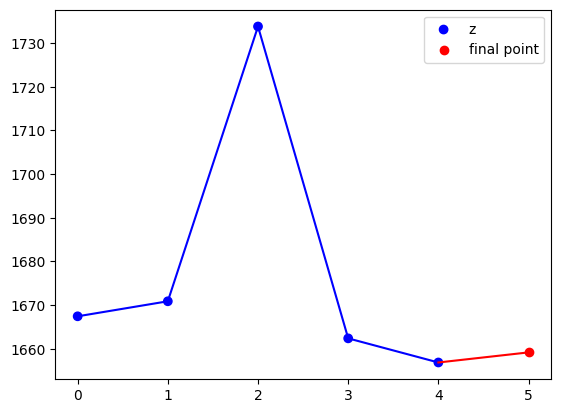

In [432]:
import matplotlib.pyplot as plt
import numpy as np


x = np.arange(len(z))

colors = ['b'] * (len(z) - 1) + ['r']

plt.scatter(x[:-1], z[:-1], c=colors[:-1], label='z')
plt.scatter(x[-1], z[-1], c=colors[-1], label='final point', marker='o', edgecolors='r')

plt.plot(x[:-1], z[:-1], linestyle='-', color='b')
plt.plot(x[-2:], z[-2:], linestyle='-', color='r')  # برای عدد آخر

plt.legend()
plt.show()


### extracting model

In [450]:
model = joblib.dump(regr, 'model.pkl')
model

['model.pkl']

In [448]:
loaded_model = joblib.load('model.pkl')

print('Coefficients: ', loaded_model.coef_)
print ('Intercept: ',loaded_model.intercept_)

Coefficients:  [[-0.03027479 -0.03800714  0.03075488  0.13635751  0.91429991]]
Intercept:  [0.00055153]
